# Finding Heavy Traffic Indicators on I-94

#### Table of Contents
* [Introduction](#1)
* [Dataset Exploration](#2)
* [Traffic Volume: Day vs Night](#3)
* [Time Indicators](#4)
* [Breakdown by Hour of Day](#5)
* [Weather Indicators](#6)
* [Traffic Volume vs categorial weather data](#7)
* [Conclusion](#8)

#### Introduction <a class='anchor' id='1'></a>

Interstate 94 (I-94) is an East-West Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. It lies along the primary route from Seattle to Toronto and is the only east-west Interstate highway to have a direct connection to Canada.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. We will be using a dataset from UCI Machine Learning Repository, which can be found [here](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

Here is a description of the columns in the dataset:

- <span style='background :black'>holiday: </span>US National holidays plus regional holidays
- <span style='background :black'>temp: </span>Average temperature in kelvin
- <span style='background :black'>rain_1h: </span>Amount in millimetres of rain that occurred in the hour
- <span style='background :black'>snow_1h: </span>Amount in millimetres of snow that occurred in the hour
- <span style='background :black'>clouds_all: </span>Percentage of cloud cover
- <span style='background :black'>weather_main: </span>Short textual description of the current weather
- <span style='background :black'>weather_description: </span>Longer textual description of the current weather
- <span style='background :black'>date_time: </span>Time of data collection in local CST time
- <span style='background :black'>traffic_volume: </span>Hourly I-94 ATR 301 reported westbound traffic volume

#### Dataset Exploration <a class='anchor' id='2'></a>

In [2]:
#Import Libraries
import pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

#Read in csv files
traffic = pd.read_csv("D:/DataQuest/Metro_Interstate_Traffic_Volume.csv")

In [3]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 48204 rows and 9 columns.

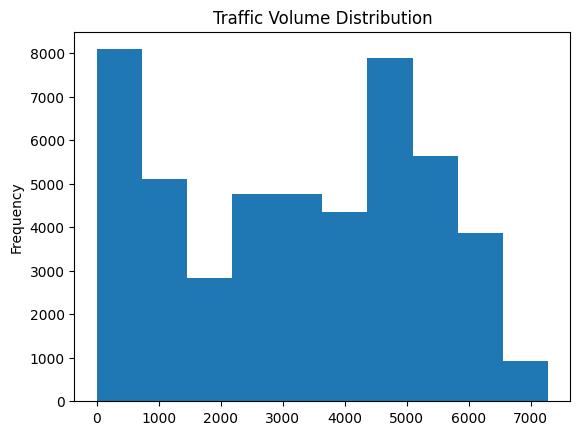

In [6]:
traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume Distribution')
plt.show()

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Traffic volume have two peaks at around 500 and 5000. Aside from the first peak, the rest of the histogram appears to follow normal distribution centered at around 5000.

#### Traffic Volume: Day vs Night <a class='anchor' id='3'></a>

Transform date into datetime using pandas

In [8]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [9]:
print(traffic['date_time'])

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]


##### Isolate: night time vs day time

In [10]:
daytime = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <19)]

In [11]:
print(daytime['date_time'].dt.hour.value_counts())

date_time
8     2080
7     2079
10    2078
9     2018
16    1988
18    1986
14    1969
12    1955
11    1952
15    1934
17    1933
13    1905
Name: count, dtype: int64


In [12]:
nighttime = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >=19)]

In [13]:
print(nighttime['date_time'].dt.hour.value_counts())

date_time
4     2091
6     2087
5     2063
1     2049
23    2040
0     2037
3     2025
2     2019
22    1994
21    1982
20    1979
19    1961
Name: count, dtype: int64


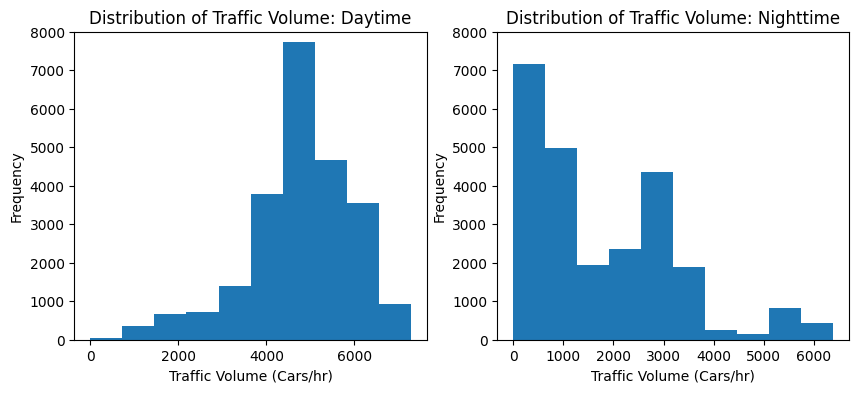

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Distribution of Traffic Volume: Daytime')
plt.ylim([0,8000])
plt.xlabel('Traffic Volume (Cars/hr)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.title('Distribution of Traffic Volume: Nighttime')
plt.ylim([0,8000])
plt.xlabel('Traffic Volume (Cars/hr)')
plt.ylabel('Frequency')
plt.show()

In [15]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Traffic volume on average is lighter at night than during day.

#### Time Indicators <a class='anchor' id='4'></a>

We will look into whether month, day of week, time of day affects traffic volume

We will look at month first using only the daytime dataset.

In [49]:
daytime.loc[:,'month'] = daytime['date_time'].dt.month
daytime.loc[:,'month'] = daytime['month'].astype(int)

In [18]:
traffic_by_month = daytime.groupby('month').mean('traffic_volume')
traffic_by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


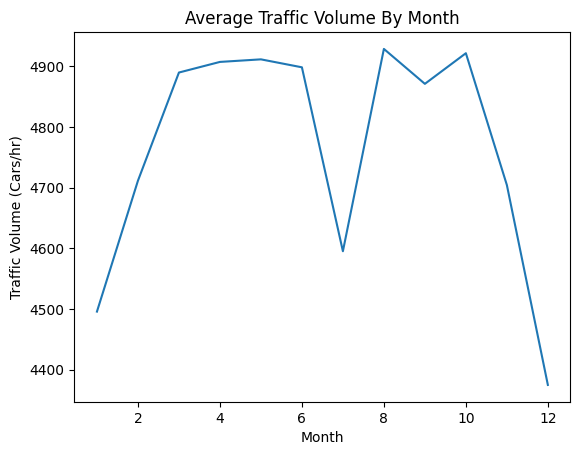

In [40]:
plt.plot(traffic_by_month.index,traffic_by_month['traffic_volume'])
plt.title('Average Traffic Volume By Month')
plt.ylabel("Traffic Volume (Cars/hr)")
plt.xlabel("Month")
plt.show()

Average traffic over the months are not so different. All within the 4400 - 5000 range. But there is less traffic around November to February.

Next let's see day of the week.

In [45]:
daytime.loc[:,'dayofweek'] = daytime['date_time'].dt.day_of_week
traffic_by_DOW = daytime.groupby('dayofweek').mean('traffic_volume')
traffic_by_DOW # 0 is Monday, 6 is Sunday

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,hour
dayofweek,,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,6.401243,12.472732
1,282.301770,0.129172,0.000194,52.333234,5189.004782,6.458757,12.369994
2,282.198316,0.068099,0.001091,53.662119,5284.454282,6.619158,12.453411
3,282.279115,0.172436,0.000148,53.993191,5311.303730,6.501184,12.459739
4,282.181216,0.092828,0.000225,51.412200,5291.600829,6.575067,12.454545
5,282.300646,0.107596,0.000094,50.446376,3927.249558,6.498821,12.391573
6,282.280340,0.133170,0.000000,52.288699,3436.541789,6.604179,12.415244


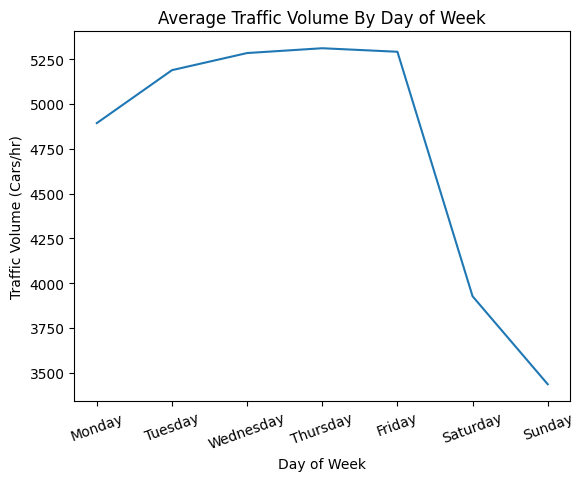

In [43]:
plt.plot(traffic_by_DOW.index,traffic_by_DOW['traffic_volume'])
plt.title('Average Traffic Volume By Day of Week')
plt.ylabel("Traffic Volume (Cars/hr)")
plt.xlabel("Day of Week")
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation=20)
plt.show()

Traffic is heavier during the weekdays.

#### Breakdown by Hour of Day <a class='anchor' id='5'></a>

We will isolate the weekday data from the weekend data first after including the hour of day column

In [46]:
daytime.loc[:,'hour'] = daytime['date_time'].dt.hour
weekday = daytime[daytime['date_time'].dt.dayofweek <5]
weekend = daytime[daytime['date_time'].dt.dayofweek >= 5]

In [23]:
weekday_byhour = weekday.groupby('hour').mean('traffic_volume')
weekday_byhour['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [24]:
weekend_byhour = weekend.groupby('hour').mean('traffic_volume')
weekend_byhour['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

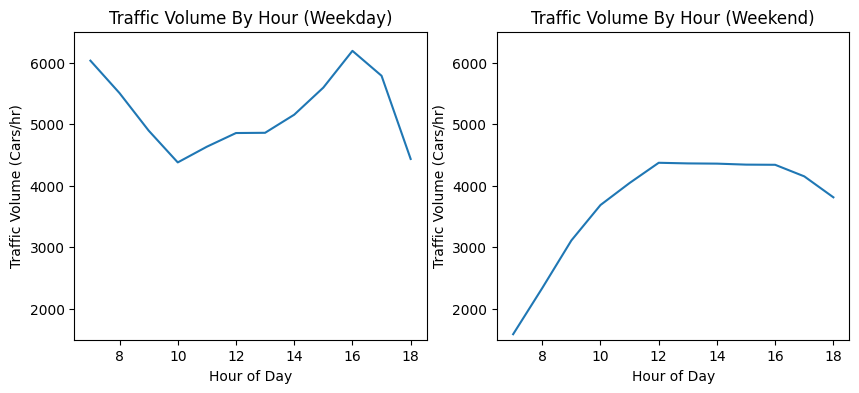

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(weekday_byhour.index,weekday_byhour['traffic_volume'])
plt.title("Traffic Volume By Hour (Weekday)")
plt.ylim([1500,6500])
plt.ylabel('Traffic Volume (Cars/hr)')
plt.xlabel('Hour of Day')

plt.subplot(1,2,2)
plt.plot(weekend_byhour.index,weekend_byhour['traffic_volume'])
plt.title("Traffic Volume By Hour (Weekend)")
plt.ylim([1500,6500])
plt.ylabel('Traffic Volume (Cars/hr)')
plt.xlabel('Hour of Day')
plt.show()

Traffic Volume is lower on weekends than weekdays. Peak hours is around 7am and 4pm during weekdays. This is roughly around going to/from work.

#### Weather Indicators <a class='anchor' id='6'></a>

Now we will look at correlation between a few weather indicators against traffic volume.

In [26]:
traffic[["temp", "rain_1h", "snow_1h", "clouds_all", "weather_main", "weather_description"]]

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,288.28,0.0,0.0,40,Clouds,scattered clouds
1,289.36,0.0,0.0,75,Clouds,broken clouds
2,289.58,0.0,0.0,90,Clouds,overcast clouds
3,290.13,0.0,0.0,90,Clouds,overcast clouds
4,291.14,0.0,0.0,75,Clouds,broken clouds
...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,Clouds,broken clouds
48200,282.76,0.0,0.0,90,Clouds,overcast clouds
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm
48202,282.09,0.0,0.0,90,Clouds,overcast clouds


We will look at the numerical columns first.

In [27]:
traffic[["traffic_volume","temp", "rain_1h", "snow_1h", "clouds_all"]].corr()['traffic_volume']

traffic_volume    1.000000
temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
Name: traffic_volume, dtype: float64

Temperature has the highest correlation R of 0.130299. We will plot this in a scatter plot.

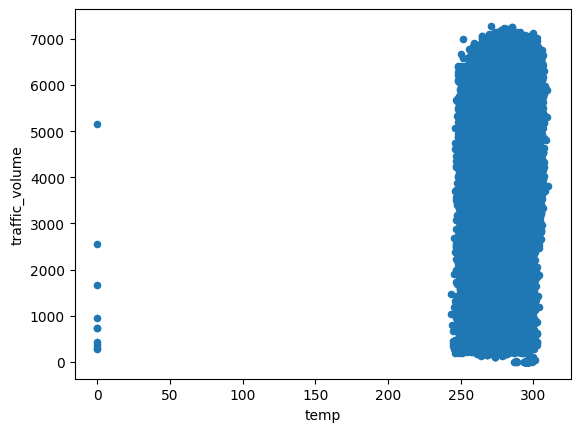

In [28]:
traffic.plot.scatter(x='temp',y='traffic_volume')
plt.show()

It is unlikely the temperature was 0 Kelvin, lets remove these.

In [29]:
removed = traffic[traffic['temp'] > 200]

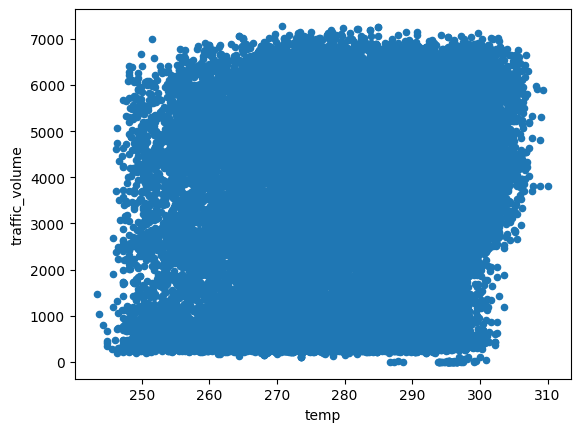

In [30]:
removed.plot.scatter(x='temp',y='traffic_volume')
plt.show()

There doesn't appear to be any correlation between temperature and traffic volume.

#### Traffic Volume vs categorial weather data <a class='anchor' id='7'></a>

In [31]:
traffic_by_main = traffic.groupby('weather_main').mean('traffic_volume')
traffic_by_description = traffic.groupby('weather_description').mean('traffic_volume')

In [32]:
print(traffic_by_description)

                                           temp     rain_1h   snow_1h  \
weather_description                                                     
SQUALLS                              292.387500    3.482500  0.000000   
Sky is Clear                         290.822151    0.000000  0.000000   
broken clouds                        281.188939    0.000000  0.000000   
drizzle                              283.005776    0.118710  0.000000   
few clouds                           284.128469    0.000000  0.000000   
fog                                  279.415713    0.087007  0.000625   
freezing rain                        272.860000    0.000000  0.000000   
haze                                 275.818581    0.046868  0.000000   
heavy intensity drizzle              285.116406    0.170156  0.000000   
heavy intensity rain                 290.326981    2.656660  0.000000   
heavy snow                           269.155536    0.001234  0.000000   
light intensity drizzle              284.246327    

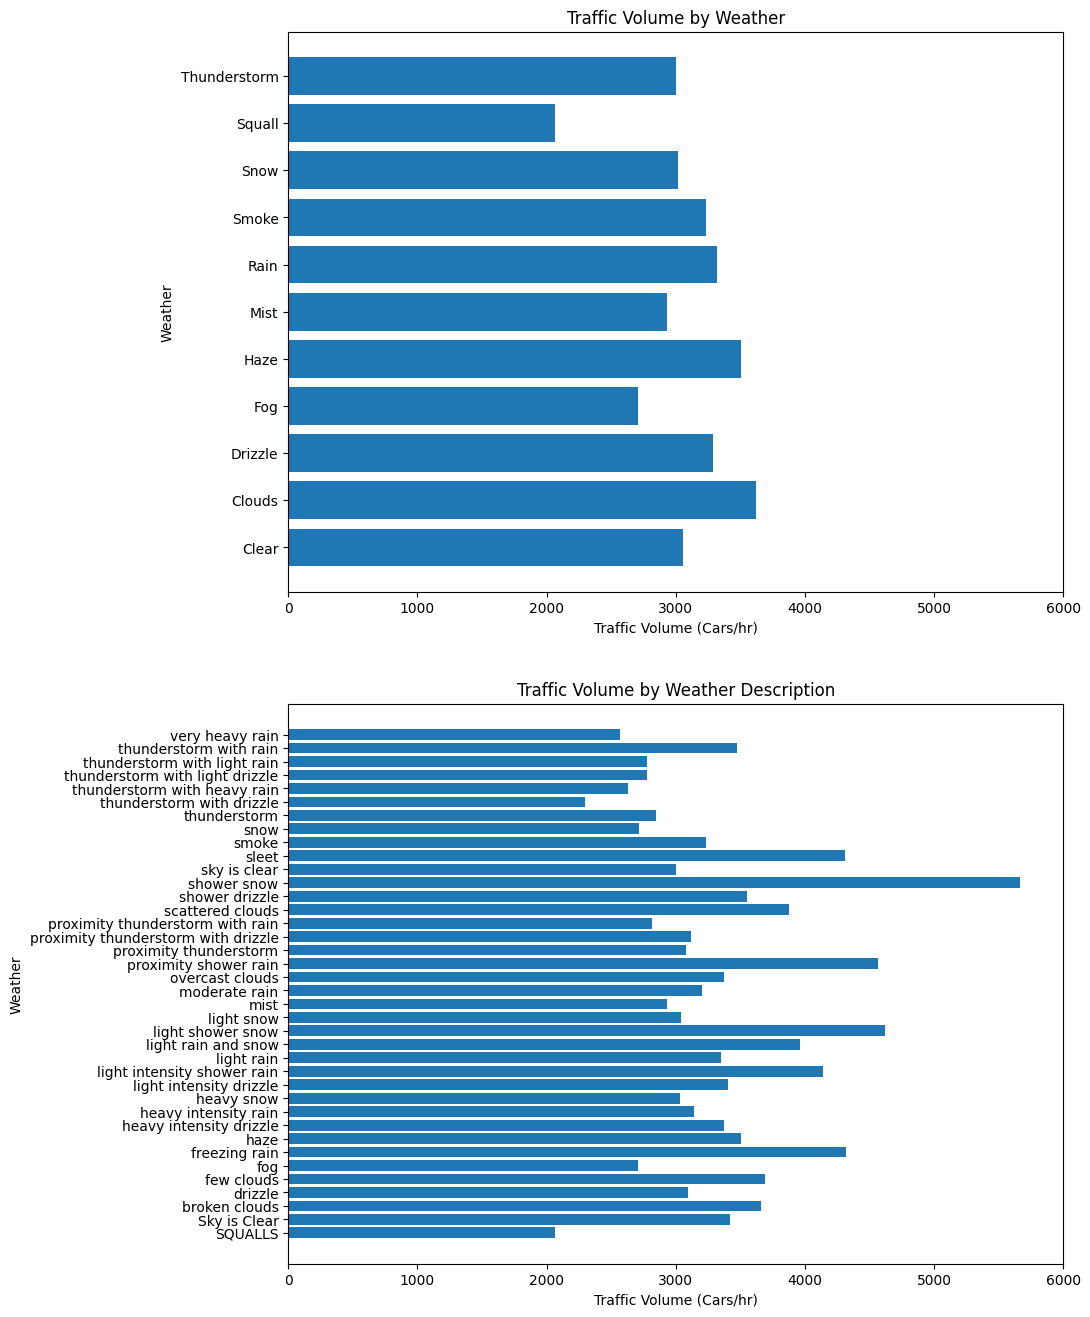

In [47]:
plt.figure(figsize=[10,16])
plt.subplot(2,1,1)
plt.barh(traffic_by_main.index,traffic_by_main['traffic_volume'])
plt.xlim([0,6000])
plt.title('Traffic Volume by Weather')
plt.ylabel('Weather')
plt.xlabel("Traffic Volume (Cars/hr)")

plt.subplot(2,1,2)
plt.barh(traffic_by_description.index,traffic_by_description['traffic_volume'])
plt.xlim([0,6000])
plt.title('Traffic Volume by Weather Description')
plt.ylabel('Weather')
plt.xlabel("Traffic Volume (Cars/hr)")
plt.show()

It appears shower snow causes highest traffic volume.

#### Conclusion <a class='anchor' id='8'></a>

In this project, we aimed to discover potential indicators of heavy traffic on the I-94 Interstate Highway.

We discovered the following:
- Traffic is heavier on weekdays than on weekends.
- Traffic is heavier during daytime than nighttime. 
- Traffic is lighter from November to February. These tend to be the colder months; however, no correlation appear to exist between traffic volume and temperature.
- Shower snow weather is correlated with the highest traffic volume out of all weather patterns.
- During the weekday, traffic is heaviest around 7 am and 4 pm.